# Multi-channel image stacks
Beyond two dimensional images which can be expressed as 2-D matrix, also higher dimensional, n-D images are quite common. The additional dimensions can be channels, space and time.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


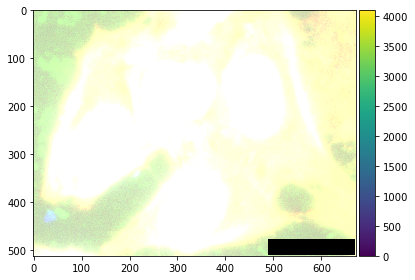

In [11]:
from skimage.io import imread, imshow
image = imread('../data/hela-cells.tif')

imshow(image)

This visualization is not perfect as discussed [here](https://forum.image.sc/t/display-multi-channel-images-with-scikit-image/51009). We need to normalize the image first. Normalization in this context means distributing all pixel intensities between 0 and 1. We can do this by dividing the image by its maximum intensity.

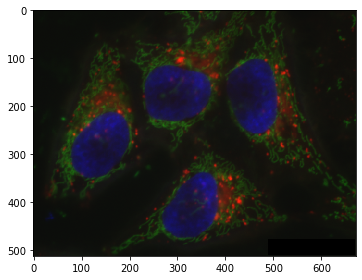

In [2]:
imshow(image / image.max())

To understand what we see, we should take a look at its shape. The image is abviously 672 pixels wide, 512 pixels high and has 3 channels:

In [3]:
image.shape

(512, 672, 3)

We can visualize these three channels independently by cropping them out:

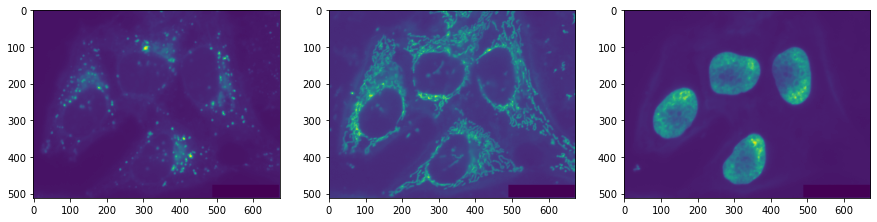

In [4]:
channel1 = image[:,:,0]
channel2 = image[:,:,1]
channel3 = image[:,:,2]

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,15))

axs[0].imshow(channel1)
axs[1].imshow(channel2)
axs[2].imshow(channel3)

To make it look similar to what we know from ImageJ for example, we should configure color maps. See [all color maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) supported by matplotlib.

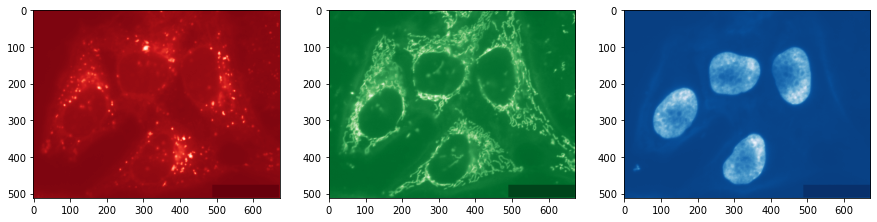

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15,15))

axs[0].imshow(channel1, cmap='Reds_r')
axs[1].imshow(channel2, cmap='Greens_r')
axs[2].imshow(channel3, cmap='Blues_r')

# Image stacks
There are also images with three spatial dimensions: X, Y, and Z. You find typical examples in microscopy and in medical imaging. Let's take a look at an Magnetic Resonance Imaging (MRI) data set:

In [2]:
from skimage.io import imread, imshow
image_stack = imread('../data/Haase_MRT_tfl3d1.tif')

TypeError: Invalid shape (192, 256, 256) for image data

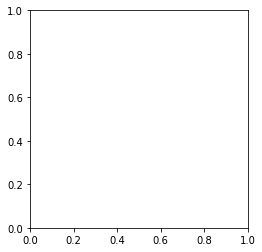

In [3]:
imshow(image_stack)

The error message suggests, we cannot just show a 3D image stack in a 2D jupyter notebook. We need to select plane(s) to show. Before doing so, we print out the size of the image stack:

In [4]:
image_stack.shape

(192, 256, 256)

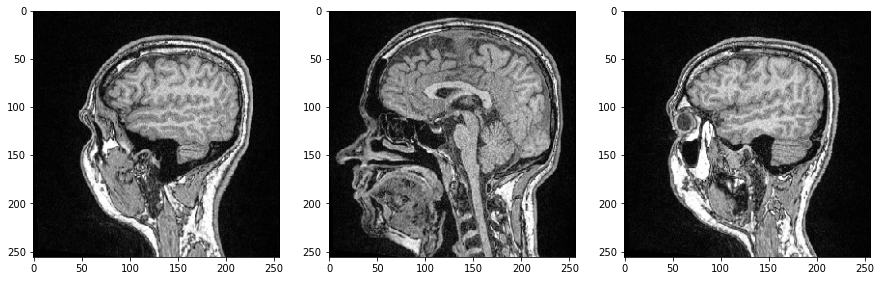

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15,15))

# show three planar images
axs[0].imshow(image_stack[48], cmap='Greys_r')
axs[1].imshow(image_stack[96], cmap='Greys_r')
axs[2].imshow(image_stack[144], cmap='Greys_r')

As all three dimensions are spatial dimensions, we can also make slices orthogonal to the image plane and corresponding to [Anatomical planes](https://en.wikipedia.org/wiki/Anatomical_plane).

Text(0.5, 1.0, 'Transverse')

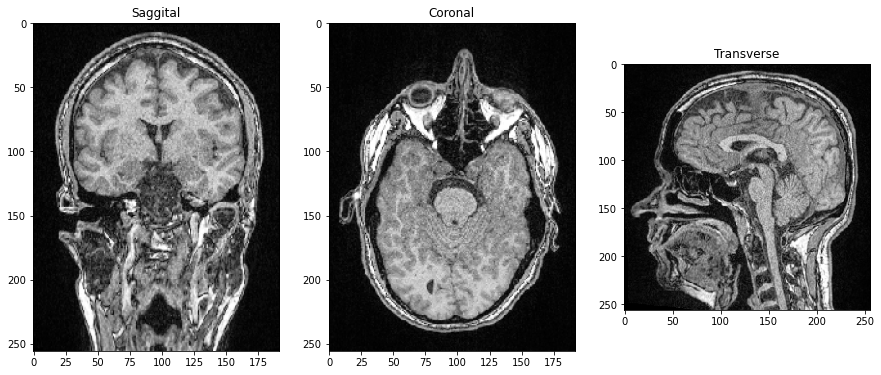

In [6]:
saggital = image_stack[:,:,128].T
coronal = image_stack[:,128,:].T
transverse = image_stack[96]

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15,15))

# show orthogonal planes
axs[0].imshow(saggital, cmap='Greys_r')
axs[0].set_title('Saggital')

axs[1].imshow(coronal, cmap='Greys_r')
axs[1].set_title('Coronal')

axs[2].imshow(transverse, cmap='Greys_r')
axs[2].set_title('Transverse')

## Videos
If an image dataset has a temporal dimension, we call it a video. Processing videos works similar to multi-channel images and image stacks. Let's open a microscopy dataset showing yeast cells rounding over time. (Image data courtesy of Anne Esslinger, Alberti lab, MPI CBG)

In [7]:
from skimage.io import imread, imshow
video = imread('../data/rounding_assay.tif')

print(video.shape)

(64, 512, 512)


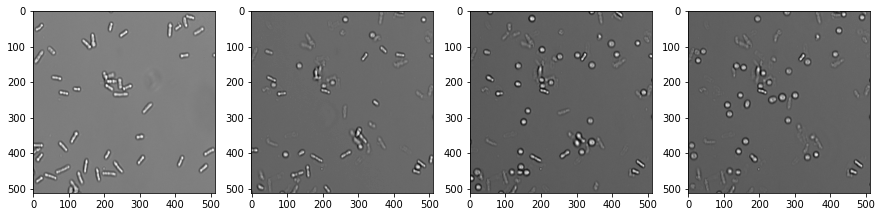

In [8]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 4, figsize=(15,15))

# show three planar images
axs[0].imshow(video[0], cmap='Greys_r')
axs[1].imshow(video[20], cmap='Greys_r')
axs[2].imshow(video[40], cmap='Greys_r')
axs[3].imshow(video[60], cmap='Greys_r')

## n-dimensional data
High-dimensional data are pretty common in microscopy. To process them correctly, one must study carefully what dimensions an image dataset has. We can explore possibilities using the `mitosis` dataset:

In [9]:
from skimage.io import imread, imshow
mitosis = imread('../data/mitosis.tif')

print(mitosis.shape)

(51, 5, 2, 196, 171)


Hint: Open the dataset in ImageJ/Fiji to understand what these numbers stand for. You can see there that the mitosis dataset has
* 51 frames,
* 5 Z-slices,
* 2 channels and
* is 171 x 196 pixels large.

We grab now channels 1 and 2 of the first time point (index 0) in the center plane (index 2):

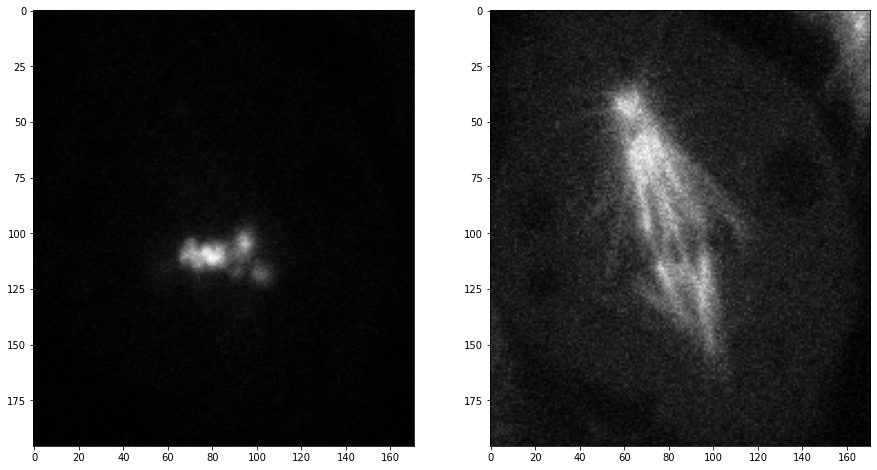

In [10]:
timepoint = 0
plane = 2

channel1 = mitosis[timepoint, plane, 0]
channel2 = mitosis[timepoint, plane, 1]


import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15,15))

axs[0].imshow(channel1, cmap='Greys_r')
axs[1].imshow(channel2, cmap='Greys_r')

## Exercise
Open the mitosis dataset, select three timepoints and show them side-by-side. The resulting figure should have three columns and two rows. In the first row, channel1 is displayed and the second channel below.